# pytorch nueral network classification

## What is a classification problem?

A [classification problem](https://en.wikipedia.org/wiki/Statistical_classification) involves predicting whether something is one thing or another.

For example, you might want to:

| Problem type | What is it? | Example |
| ----- | ----- | ----- |
| **Binary classification** | Target can be one of two options, e.g. yes or no | Predict whether or not someone has heart disease based on their health parameters. |
| **Multi-class classification** | Target can be one of more than two options | Decide whether a photo of is of food, a person or a dog. |
| **Multi-label classification** | Target can be assigned more than one option | Predict what categories should be assigned to a Wikipedia article (e.g. mathematics, science & philosohpy). |

<div align="center">
<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-different-classification-problems.png" alt="various different classification in machine learning such as binary classification, multiclass classification and multilabel classification" width=900/>
</div>
    
Classification, along with regression (predicting a number, covered in [notebook 01](https://www.learnpytorch.io/01_pytorch_workflow/)) is one of the most common types of machine learning problems.

In this notebook, we're going to work through a couple of different classification problems with PyTorch. 

In other words, taking a set of inputs and predicting what class those set of inputs belong to.




In [1]:
import sklearn
from sklearn.datasets import make_circles
X,y=make_circles(n_samples=1000,noise=0.03,random_state=42)#noise is the standard deviation of the guassian noise
print(X.shape,y.shape)
X[0:5],y[0:5]


(1000, 2) (1000,)


(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [2]:
import pandas as pd
circle=pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"Y":y})
circle.head()

,X0,X1,Y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


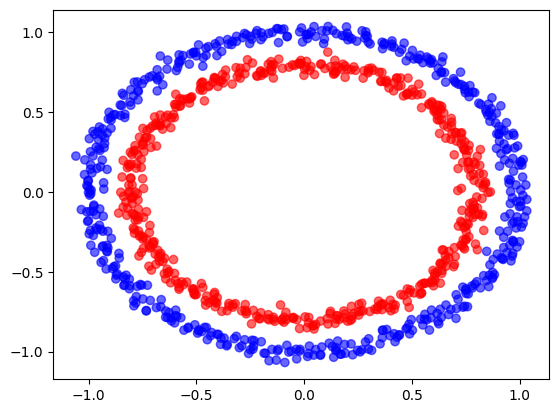

In [3]:
import matplotlib.pyplot as plt
plt.scatter(circle["X0"],circle["X1"],c=circle["Y"],cmap="bwr",alpha=0.6)

toydataset is small set but enugh for the experiment


In [4]:
# turn data in tensor
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")


X=torch.from_numpy(X).float().to(device)
y=torch.tensor(y).float().to(device)
X[:5],y[:5],X.dtype,y.dtype


(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]], device='cuda:0'),
 tensor([1., 1., 1., 1., 0.], device='cuda:0'),
 torch.float32,
 torch.float32)

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# creating circle model

In [6]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
class circlemodelV0(nn.Module):
    # torch.manual_seed(42)
    # torch.cuda.manual_seed(42)
    def __init__(self):
        super().__init__()#super 
        self.fc1=nn.Linear(2,16)
        self.fc2=nn.Linear(16,1)
        #self.fc3=nn.Linear(8,1)
    #defining the forward pass
    def forward(self,X):
        X=F.relu(self.fc1(X))# relu is the activation function max(0,x) give more non linearity to the model
        #X=F.relu(self.fc2(X))
        X=self.fc2(X)
        return X
        return self.fc2(self.fc1(X))
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_circle_01=circlemodelV0().to(device)
    

In [7]:

model_circle_01.state_dict()


OrderedDict([('fc1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802],
                      [-0.3258, -0.0829],
                      [-0.2872,  0.4691],
                      [-0.5582, -0.3260],
                      [-0.1997, -0.4252],
                      [ 0.0667, -0.6984],
                      [ 0.6386, -0.6007]], device='cuda:0')),
             ('fc1.bias',
              tensor([ 0.5459,  0.1177, -0.2296,  0.4370,  0.1102,  0.5713,  0.0773, -0.2230,
                       0.1900, -0.1918,  0.2976,  0.6313,  0.4087, -0.3091,  0.4082,  0.1265],
                     device='cuda:0')),
             ('fc2.weight

In [8]:
# make preds
with torch.inference_mode():
    preds=model_circle_01(X)
    print(preds[:5])

tensor([[ 0.2791],
        [-0.0225],
        [-0.0406],
        [-0.0307],
        [ 0.1767]], device='cuda:0')


### 2.1 Setup loss function and optimizer

We've setup a loss (also called a criterion or cost function) and optimizer before in [notebook 01](https://www.learnpytorch.io/01_pytorch_workflow/#creating-a-loss-function-and-optimizer-in-pytorch).

But different problem types require different loss functions. 

For example, for a regression problem (predicting a number) you might used mean absolute error (MAE) loss.

And for a binary classification problem (like ours), you'll often use [binary cross entropy](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a) as the loss function.

However, the same optimizer function can often be used across different problem spaces.

For example, the stochastic gradient descent optimizer (SGD, `torch.optim.SGD()`) can be used for a range of problems, and the same applies to the Adam optimizer (`torch.optim.Adam()`). 

| Loss function/Optimizer | Problem type | PyTorch Code |
| ----- | ----- | ----- |
| Stochastic Gradient Descent (SGD) optimizer | Classification, regression, many others. | [`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) |
| Adam Optimizer | Classification, regression, many others. | [`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) |
| Binary cross entropy loss | Binary classification | [`torch.nn.BCELossWithLogits`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) or [`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) |
| Cross entropy loss | Mutli-class classification | [`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) |
| Mean absolute error (MAE) or L1 Loss | Regression | [`torch.nn.L1Loss`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html) | 
| Mean squared error (MSE) or L2 Loss | Regression | [`torch.nn.MSELoss`](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss) |  

*Table of various loss functions and optimizers, there are more but these some common ones you'll see.*

Since we're working with a binary classification problem, let's use a binary cross entropy loss function.

> **Note:** Recall a **loss function** is what measures how *wrong* your model predictions are, the higher the loss, the worse your model.
>
> Also, PyTorch documentation often refers to loss functions as "loss criterion" or "criterion", these are all different ways of describing the same thing.

PyTorch has two binary cross entropy implementations:
1. [`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) - Creates a loss function that measures the binary cross entropy between the target (label) and input (features).
2. [`torch.nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) - This is the same as above except it has a sigmoid layer ([`nn.Sigmoid`](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html)) built-in (we'll see what this means soon).

Which one should you use? 

The [documentation for `torch.nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) states that it's more numerically stable than using `torch.nn.BCELoss()` after a `nn.Sigmoid` layer. 

So generally, implementation 2 is a better option. However for advanced usage, you may want to separate the combination of `nn.Sigmoid` and `torch.nn.BCELoss()` but that is beyond the scope of this notebook.

Knowing this, let's create a loss function and an optimizer. 

For the optimizer we'll use `torch.optim.SGD()` to optimize the model parameters with learning rate 0.1.

> **Note:** There's a [discussion on the PyTorch forums about the use of `nn.BCELoss` vs. `nn.BCEWithLogitsLoss`](https://discuss.pytorch.org/t/bceloss-vs-bcewithlogitsloss/33586/4). It can be confusing at first but as with many things, it becomes easier with practice.

In [9]:
#loss fxn
loss_fn = nn.BCEWithLogitsLoss()

optimizer=optim.Adam(model_circle_01.parameters(),lr=0.01)


In [10]:
# calculate acuracy
def accuracy_fn(y_pred,y_test):
    correct=torch.eq(y_pred.round(),y_test).sum().item()
    acc=correct/len(y_pred)*100
    return acc


They're now in the form of **prediction probabilities** (I usually refer to these as `y_pred_probs`), in other words, the values are now how much the model thinks the data point belongs to one class or another.
More specificially:
* If `y_pred_probs` >= 0.5, `y=1` (class 1)
* If `y_pred_probs` < 0.5, `y=0` (class 0)

In [11]:
#logits
model_circle_01.eval()
with torch.no_grad():
    y_logits=model_circle_01(X_test)# simple y_pred we get
    print("ylogit ",y_logits[:5])
# using sigmoid
    y_pred=torch.sigmoid(y_logits)# negetive to less than 0.5 and positive to more than 0.5
# rounding  
    y_pred=torch.round(y_pred)#if ypred is negative then sigmoid will make it less than 0.5 and round will make it 0
    #if ypred is positive then sigmoid will make it more than 0.5 and round will make it 1
y_pred[0:5]


ylogit  tensor([[-0.0242],
        [ 0.0590],
        [ 0.0846],
        [-0.0360],
        [ 0.1882]], device='cuda:0')


tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.]], device='cuda:0')

# train model


Okay, now we've got a loss function and optimizer ready to go, let's train a model.

Do you remember the steps in a PyTorch training loop?

If not, here's a reminder.

Steps in training:

<details>
    <summary>PyTorch training loop steps</summary>
    <ol>
        <li><b>Forward pass</b> - The model goes through all of the training data once, performing its
            <code>forward()</code> function
            calculations (<code>model(x_train)</code>).
        </li>
        <li><b>Calculate the loss</b> - The model's outputs (predictions) are compared to the ground truth and evaluated
            to see how
            wrong they are (<code>loss = loss_fn(y_pred, y_train</code>).</li>
        <li><b>Zero gradients</b> - The optimizers gradients are set to zero (they are accumulated by default) so they
            can be
            recalculated for the specific training step (<code>optimizer.zero_grad()</code>).</li>
        <li><b>Perform backpropagation on the loss</b> - Computes the gradient of the loss with respect for every model
            parameter to
            be updated (each parameter
            with <code>requires_grad=True</code>). This is known as <b>backpropagation</b>, hence "backwards"
            (<code>loss.backward()</code>).</li>
        <li><b>Step the optimizer (gradient descent)</b> - Update the parameters with <code>requires_grad=True</code>
            with respect to the loss
            gradients in order to improve them (<code>optimizer.step()</code>).</li>
    </ol>
</details>



In [12]:
# building the training loop
#loss fxn
loss_fn = nn.BCEWithLogitsLoss()

optimizer=optim.Adam(model_circle_01.parameters(),lr=0.1)

torch.manual_seed(42)
# torch.cuda.manual_seed(42)
epochs=1000
losses=[]
losses_test=[]
accs_train=[]
accs_test=[]

for epoch in range(epochs):
    model_circle_01.train()
    #forward pass
    y_logits=model_circle_01(X_train).squeeze()
    y_pred=torch.round(torch.sigmoid(y_logits))
     #loss and accuracy
    loss=loss_fn(y_logits,y_train)# we use y_logits because we are using BCEWithLogitsLoss
    losses.append(loss.item())
    acc=accuracy_fn(y_pred,y_train)
    accs_train.append(acc)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_circle_01.eval()
    with torch.no_grad():
        model_circle_01.eval()
        y_logits_test=model_circle_01(X_test).squeeze()
        y_pred_test=torch.round(torch.sigmoid(y_logits_test))
        loss_test=loss_fn(y_logits_test,y_test)
        acc_test=accuracy_fn(y_pred_test,y_test)
        losses_test.append(loss_test.item())
        accs_test.append(acc_test)
        if epoch%10==0:
            print(f"{epoch} Loss train:{loss.item()} , loss test{loss_test.item()} training acc {acc} , testing acc {acc_test}")
    

0 Loss train:0.6947808861732483 , loss test0.7124797105789185 training acc 52.125 , testing acc 50.0
10 Loss train:0.6418431997299194 , loss test0.6464230418205261 training acc 65.25 , testing acc 76.5
20 Loss train:0.5026590824127197 , loss test0.5065017342567444 training acc 99.25 , testing acc 92.5
30 Loss train:0.2760310173034668 , loss test0.2872310280799866 training acc 99.75 , testing acc 100.0
40 Loss train:0.11443252116441727 , loss test0.13384579122066498 training acc 100.0 , testing acc 100.0
50 Loss train:0.04923151433467865 , loss test0.07191207259893417 training acc 100.0 , testing acc 100.0
60 Loss train:0.026789091527462006 , loss test0.043814972043037415 training acc 100.0 , testing acc 100.0
70 Loss train:0.017911003902554512 , loss test0.031847190111875534 training acc 100.0 , testing acc 100.0
80 Loss train:0.013633511029183865 , loss test0.026344437152147293 training acc 100.0 , testing acc 100.0
90 Loss train:0.011149978265166283 , loss test0.022555699571967125 tr

# evaluuate the modeland visulizaton
` by visualizing`


In [14]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


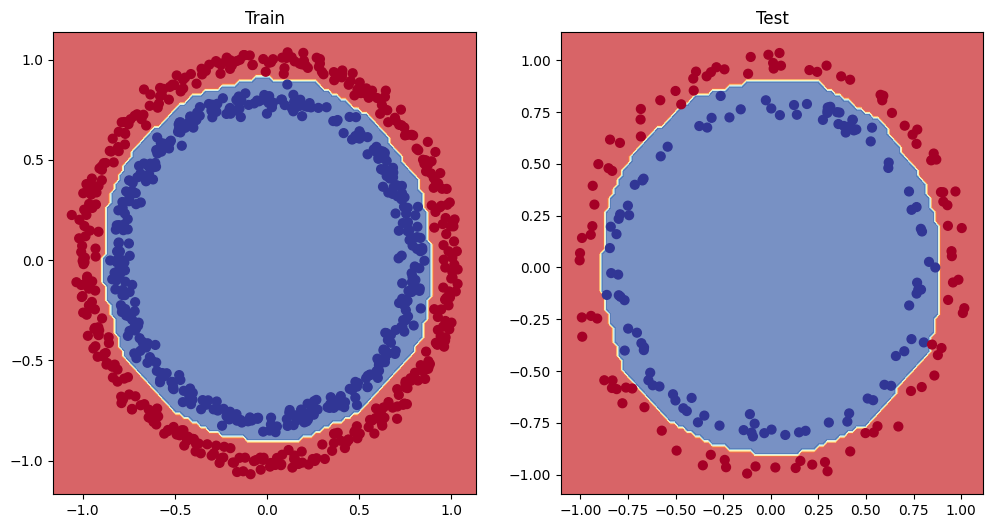

In [15]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_circle_01, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_circle_01, X_test, y_test)


`plot_boundary_pridiction wil create model to cpu`

In [16]:
model_circle_01 = model_circle_01.to(device)